# Quantum Process Tomography

Quantum process tomography (QPT) is a method used to characterize the behavior of quantum systems. The goal of QPT is to determine the quantum operation (or "process") that describes the evolution of a quantum system over time. This information can be used to determine the performance of quantum devices, to optimize their behavior, and to verify that they are functioning as intended.


------

In QPT, a series of known quantum states are sent through the quantum system, and the output states are measured. This measurement information is then used to reconstruct the process matrix, which describes the quantum operation that the system underwent. This matrix can be used to determine the performance of the quantum system, as well as to identify any errors that may have occurred during the operation.

-----


QPT is a crucial tool in the development and implementation of quantum technologies, such as quantum computing and quantum communication. By characterizing the behavior of quantum systems, QPT helps to ensure that these systems are functioning as intended, and that they are secure and reliable for use in real-world applications.

In [4]:
%pip install qutip_qip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.6/105.6 KB 2.5 MB/s eta 0:00:00


In [5]:
import numpy as np
from qutip import (about, qeye, qpt, qpt_plot_combined, sigmax, sigmay, sigmaz,
                   spost, spre)
from qutip_qip.operations import (cnot, fredkin, iswap, phasegate, snot,
                                  sqrtiswap, swap, toffoli)

%matplotlib inline

In [6]:
"""
Plot the process tomography matrices for some 1, 2, and 3-qubit qubit gates.
"""
gates = [
    ["C-NOT", cnot()],
    ["SWAP", swap()],
    ["$i$SWAP", iswap()],
    [r"$\sqrt{i\mathrm{SWAP}}$", sqrtiswap()],
    ["S-NOT", snot()],
    [r"$\pi/2$ phase gate", phasegate(np.pi / 2)],
    ["Toffoli", toffoli()],
    ["Fredkin", fredkin()],
]

In [7]:
def plt_qpt_gate(gate, figsize=(8, 6)):

    name = gate[0]
    U_psi = gate[1]

    N = len(U_psi.dims[0])  # number of qubits

    # create a superoperator for the density matrix
    # transformation rho = U_psi * rho_0 * U_psi.dag()
    U_rho = spre(U_psi) * spost(U_psi.dag())

    # operator basis for the process tomography
    op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()] for i in range(N)]

    # labels for operator basis
    op_label = [["$i$", "$x$", "$y$", "$z$"] for i in range(N)]

    # calculate the chi matrix
    chi = qpt(U_rho, op_basis)

    # visualize the chi matrix
    fig, ax = qpt_plot_combined(chi, op_label, name, figsize=figsize)

    ax.set_title(name)

    return fig, ax

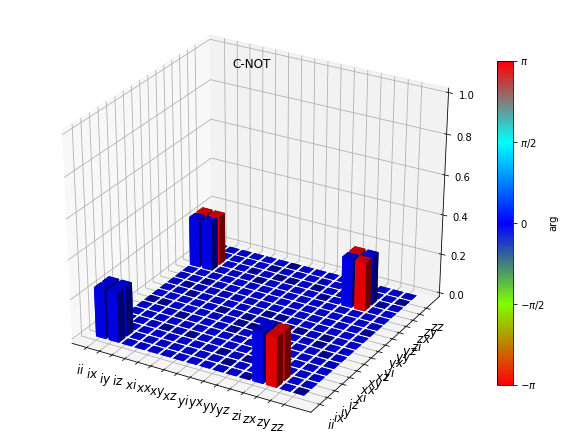

In [8]:
plt_qpt_gate(gates[0]);

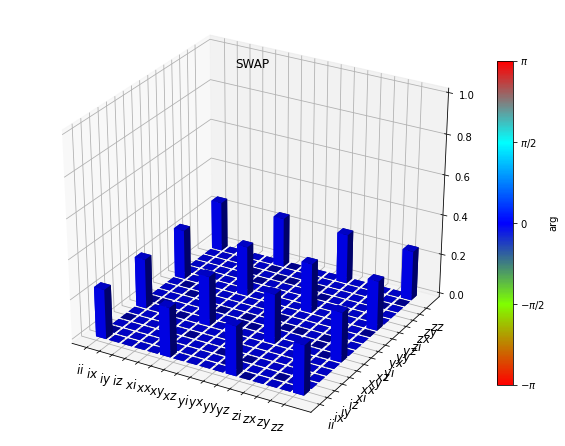

In [9]:
plt_qpt_gate(gates[1]);

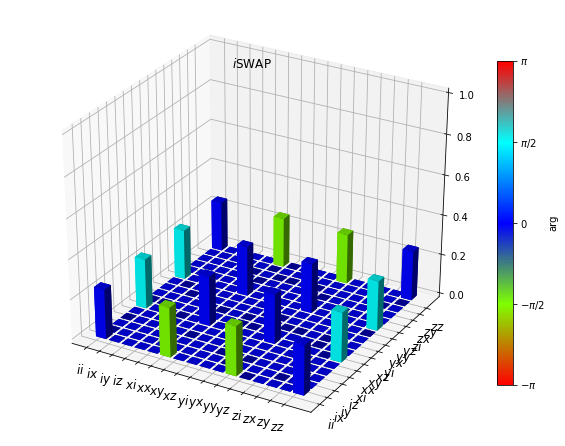

In [10]:
plt_qpt_gate(gates[2]);

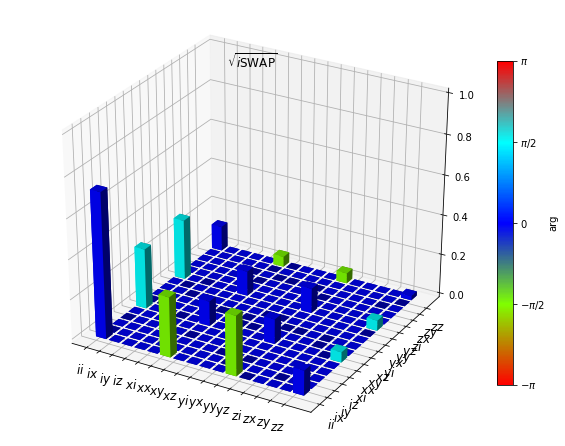

In [11]:
plt_qpt_gate(gates[3]);

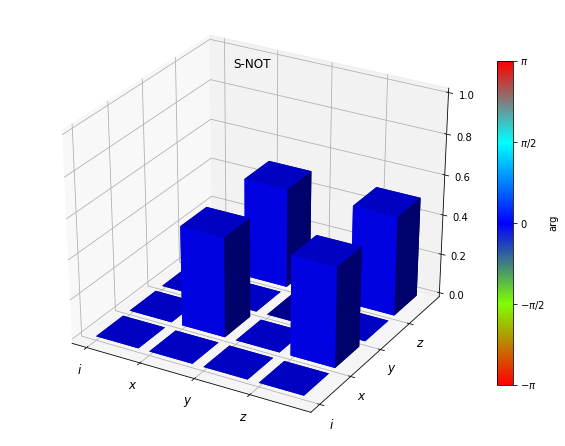

In [12]:
plt_qpt_gate(gates[4]);

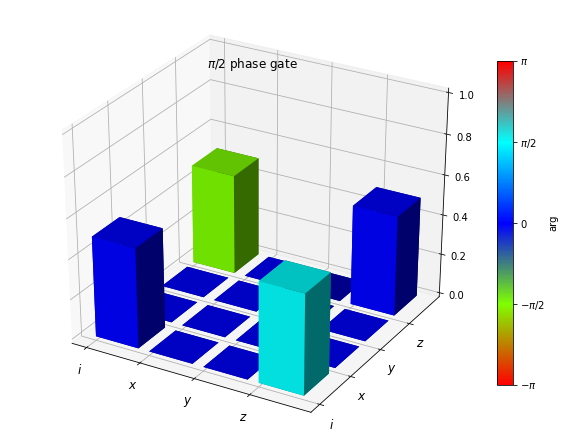

In [13]:
plt_qpt_gate(gates[5]);

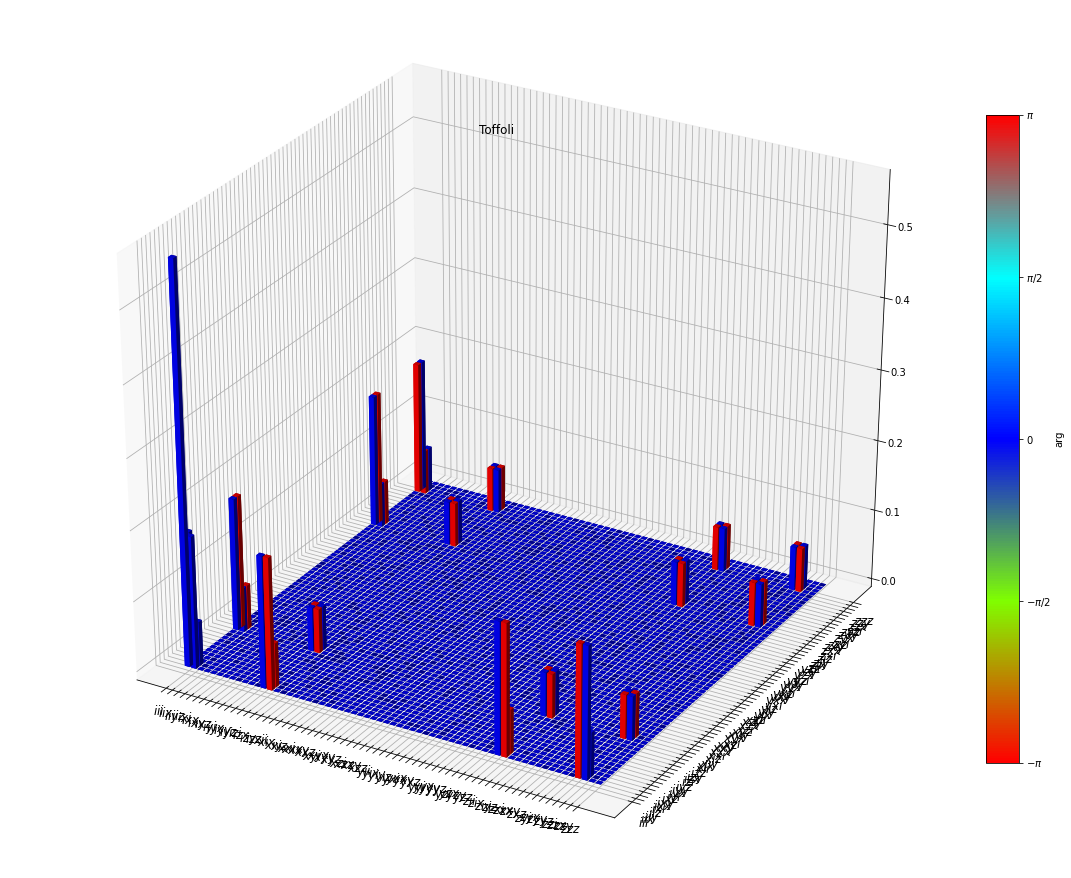

In [14]:
fig, ax = plt_qpt_gate(gates[6], figsize=(16, 12))
ax.axis("tight");

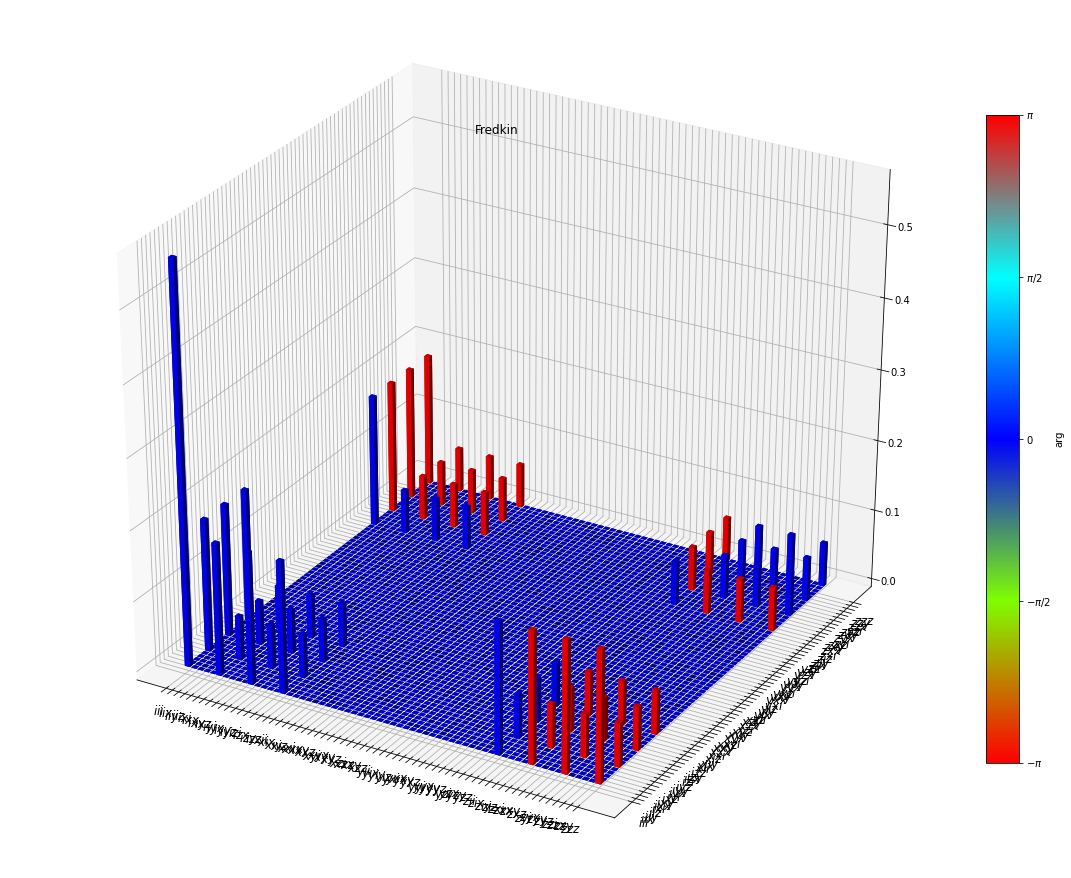

In [15]:
fig, ax = plt_qpt_gate(gates[7], figsize=(16, 12))
ax.axis("tight");

## Software Versions


In [16]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.1
Numpy Version:      1.21.6
Scipy Version:      1.7.3
Cython Version:     0.29.33
Matplotlib Version: 3.2.2
Python Version:     3.8.10
Number of CPUs:     2
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /usr/local/lib/python3.8/dist-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qut